In [114]:
# Base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# EDA
import missingno as msno

# Visualisation
import matplotlib.pyplot as plt


from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree

# Text-Based Analyses
import gensim.downloader
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity

# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Classifiers
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                
from sklearn.linear_model import SGDClassifier                                      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                        
from sklearn.ensemble import AdaBoostClassifier 

# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch  

# Scalers and Transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline                                               
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score  

In [115]:
# Set Seed
SEED = 50

In [116]:
# Import data
path = "data/kickstarter_projects.csv"

df_kickstarter = pd.read_csv(path)
df_kickstarter.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [117]:
# Converting dates to datetime objects
df_kickstarter['Launched'] = pd.to_datetime(df_kickstarter['Launched'], format='%Y-%m-%d %H:%M:%S')
df_kickstarter['Deadline'] = pd.to_datetime(df_kickstarter['Deadline'], format='%Y-%m-%d')

In [16]:
df_kickstarter.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [118]:
df_kickstarter_filtered = df_kickstarter[df_kickstarter['State'].isin(['Successful', 'Failed'])]
df_kickstarter_filtered['State_num'] = df_kickstarter_filtered['State'].map({'Successful': 1, 'Failed': 0})
df_kickstarter_filtered

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,State_num
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0
...,...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful,1
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful,1
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful,1
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful,1


In [119]:
# Temporal patterns
df_kickstarter_filtered['ProjectDuration'] = (df_kickstarter_filtered['Deadline'] - df_kickstarter['Launched']).dt.days
df_kickstarter_filtered['LaunchYear'] = df_kickstarter_filtered['Launched'].dt.year
df_kickstarter_filtered['LaunchMonth'] = df_kickstarter_filtered['Launched'].dt.month
df_kickstarter_filtered['LaunchDay'] = df_kickstarter_filtered['Launched'].dt.day
df_kickstarter_filtered['DayOfWeek'] = df_kickstarter_filtered['Launched'].dt.dayofweek #0=Monday, 6=Sunday

In [19]:
df_kickstarter_filtered.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,State_num,ProjectDuration,LaunchYear,LaunchMonth,LaunchDay,DayOfWeek
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0,39.0,2009,4,21,1
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0,87.0,2009,4,23,3


## Early Split

In [120]:
X = df_kickstarter
y = df_kickstarter

X = df_kickstarter_filtered.drop(columns=['State_num'])  # Drop the target column to create feature matrix
y = df_kickstarter_filtered['State_num']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

### Log Transform for Train and Test split

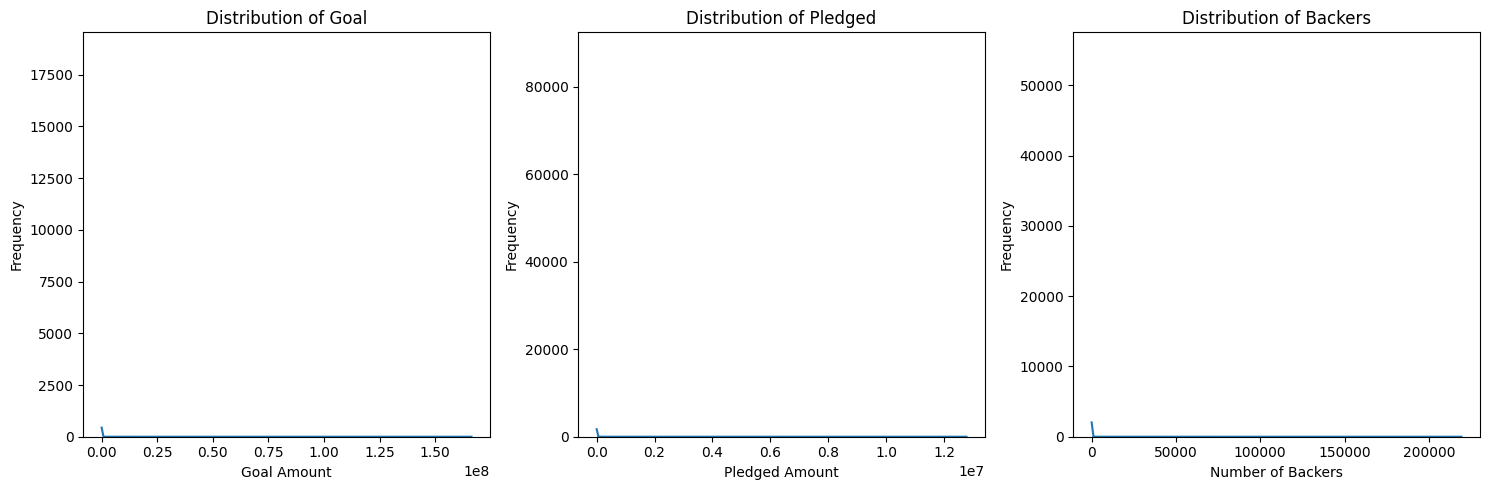

In [22]:
# Plotting Histograms of numeric columns Goal, Pledged, Backers
# WARNING: Running this takes forever
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(X_train['Goal'], kde=True)
plt.title('Distribution of Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(X_train['Pledged'], kde=True)
plt.title('Distribution of Pledged')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(X_train['Backers'], kde=True)
plt.title('Distribution of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
# Log transform the numerical columns. Handle potential errors from log(0)
def log_transform(x):
    return np.log1p(x)

X_train['log_Goal'] = log_transform(X_train['Goal'])
X_train['log_Pledged'] = log_transform(X_train['Pledged'])
X_train['log_Backers'] = log_transform(X_train['Backers'])

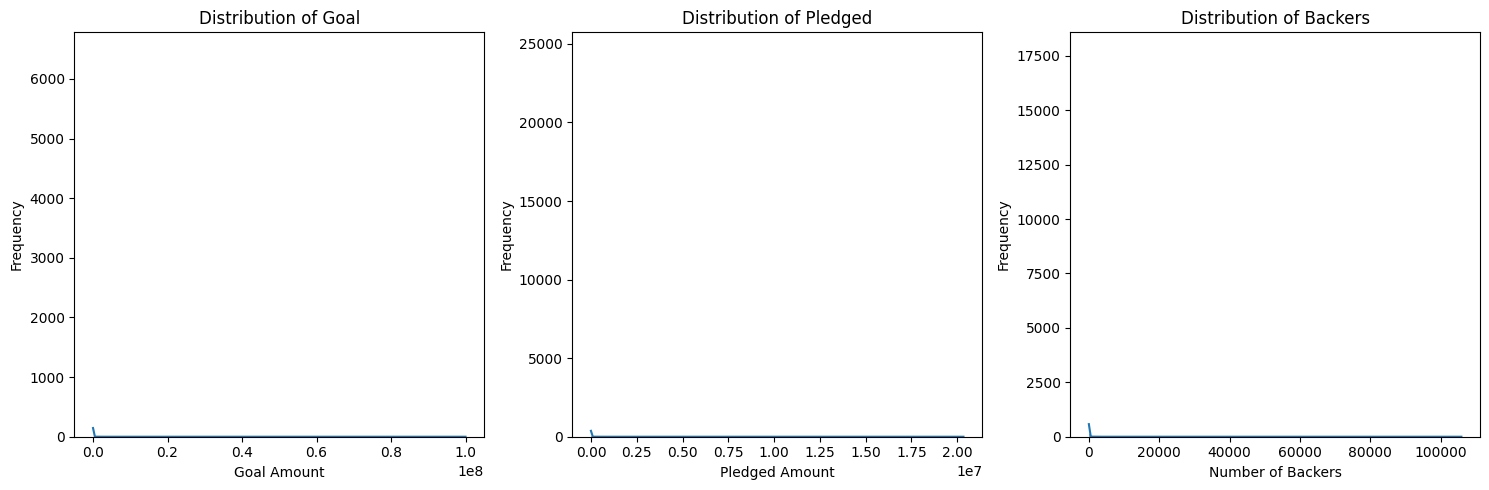

In [25]:
# Plotting Histograms of numeric columns Goal, Pledged, Backers
# WARNING: Running this takes forever
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(X_test['Goal'], kde=True)
plt.title('Distribution of Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(X_test['Pledged'], kde=True)
plt.title('Distribution of Pledged')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(X_test['Backers'], kde=True)
plt.title('Distribution of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
# Log transform the numerical columns. Handle potential errors from log(0)
def log_transform(x):
    return np.log1p(x)

X_test['log_Goal'] = log_transform(X_test['Goal'])
X_test['log_Pledged'] = log_transform(X_test['Pledged'])
X_test['log_Backers'] = log_transform(X_test['Backers'])

In [122]:
# X_train.to_csv('X_train.csv', index=False)
X_train = pd.read_csv('X_train.csv')

In [123]:
# X_test.to_csv('X_test.csv', index=False)
X_test = pd.read_csv('X_test.csv')

# Continue working on X_data (X_train or X_test)

In [124]:
X_data = X_train.copy()
y_data = y_train.copy()
X_data1 = X_train.copy()
X_data2 = X_test.copy()


In [125]:
X_data.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,ProjectDuration,LaunchYear,LaunchMonth,LaunchDay,DayOfWeek,log_Goal,log_Pledged,log_Backers
0,2077950867,"LeadaHose, The world's most versatile dog leash!",Design,Product Design,Australia,2014-08-13 01:55:07,2014-09-10,18106,14270,68,Failed,27.0,2014,8,13,2,9.804054,9.565985,4.234107
1,217179753,The Stairs,Film & Video,Animation,United States,2012-06-16 23:05:26,2012-07-16,3800,125,2,Failed,29.0,2012,6,16,5,8.243019,4.836282,1.098612


In [126]:
# Percentage funded, handle 0 cases
def calculate_percentage_funded(row):
    if row['Goal'] == 0:
        if row['Pledged'] > 0:
            return 100  # 100% if Goal is 0 and Pledged > 0
        else:
            return 0    # 0% if Goal and Pledged are 0
    else:
        return (row['Pledged'] / row['Goal']) * 100

In [127]:
# Apply function
X_data['PercentageFunded'] = X_data.apply(calculate_percentage_funded, axis=1)

In [128]:
# Backers per Dollar pledged, handle 0 cases
def calculate_backers_per_dollar(row):
    if row['Pledged'] == 0:
        return 0 #Handle division by zero
    else:
        return row['Backers'] / row['Pledged']

In [129]:
# Apply function
X_data['BackersPerDollar'] = X_data.apply(calculate_backers_per_dollar, axis=1)

In [130]:
# Check new features
print(X_data[['Goal', 'Pledged', 'Backers', 'PercentageFunded', 'BackersPerDollar']].head())

    Goal  Pledged  Backers  PercentageFunded  BackersPerDollar
0  18106    14270       68         78.813653          0.004765
1   3800      125        2          3.289474          0.016000
2   4551        0        0          0.000000          0.000000
3   3000   289108     4978       9636.933333          0.017218
4  25000    32119      391        128.476000          0.012173


In [131]:
column_list = X_data.columns.tolist()

In [132]:
X_data['State_num'] = X_data['State'].map({'Successful': 1, 'Failed': 0}) # Adding state_num again for statistics

In [133]:
# Assuming 'y' is the target column and df contains the features
num_col_stats = ['log_Pledged', 'log_Goal', 'log_Backers', 'ProjectDuration', 'PercentageFunded', 'BackersPerDollar', 'State_num']
X_data_num_df = X_data[num_col_stats]
correlation_matrix = X_data_num_df.corr()  # Compute correlation matrix for all columns
correlation_with_y = correlation_matrix['State_num']  # Get the correlation with target 'y'

# Print the correlation with the target variable 'y'
print(correlation_matrix)
print('-------------------------------------------------------------------')
print(correlation_with_y)

                  log_Pledged  log_Goal  log_Backers  ProjectDuration   
log_Pledged          1.000000  0.139972     0.930996        -0.030821  \
log_Goal             0.139972  1.000000     0.125866         0.185907   
log_Backers          0.930996  0.125866     1.000000        -0.047110   
ProjectDuration     -0.030821  0.185907    -0.047110         1.000000   
PercentageFunded     0.014007 -0.043420     0.019769         0.003665   
BackersPerDollar    -0.341179 -0.015454    -0.224994         0.009156   
State_num            0.654402 -0.223272     0.704015        -0.117189   

                  PercentageFunded  BackersPerDollar  State_num  
log_Pledged               0.014007         -0.341179   0.654402  
log_Goal                 -0.043420         -0.015454  -0.223272  
log_Backers               0.019769         -0.224994   0.704015  
ProjectDuration           0.003665          0.009156  -0.117189  
PercentageFunded          1.000000         -0.002227   0.014490  
BackersPerDollar   

In [ ]:
# df_X_data_columns_model = ['Category', 'Country', 'log_Backers', 'ProjectDuration', 'LaunchYear', 'LaunchMonth', 'DayOfWeek', 'PercentageFunded'] # acc 99 for both
# df_X_data_columns_model = ['Category', 'Country', 'log_Goal', 'LaunchYear', 'LaunchMonth', 'DayOfWeek'] # acc 67
df_X_data_columns_model= ['Category', 'Country', 'log_Goal', 'log_Backers', 'ProjectDuration', 'LaunchYear', 'LaunchMonth', 'DayOfWeek'] # 94

X_data_model = X_data[df_X_data_columns_model]
X_data_model.head(2)

,Category,Country,log_Goal,log_Backers,ProjectDuration,LaunchYear,LaunchMonth,DayOfWeek
0,Design,Australia,9.804054,4.234107,27.0,2014,8,2
1,Film & Video,United States,8.243019,1.098612,29.0,2012,6,5


## One-hot Encoding categorical features

In [199]:
# categorical_cols = ['Category', 'Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']
categorical_cols = ['Category', 'Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']

In [200]:
# Create column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' #keep other columns as they are
)

In [201]:
# Apply the one-hot encoding
encoded_data = ct.fit_transform(X_data_model)

In [202]:
#Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())

In [203]:
#Verification: Check the shape of the DataFrame
print("Original DataFrame shape:", X_data_model.shape)
print("Encoded DataFrame shape:", encoded_df.shape)

Original DataFrame shape: (265169, 8)
Encoded DataFrame shape: (265169, 68)


In [206]:
def get_encoded_data_frame_for_x(data, categorical_cols):
    # sddsad
    data['PercentageFunded'] = data.apply(calculate_percentage_funded, axis=1)
    data['BackersPerDollar'] = data.apply(calculate_backers_per_dollar, axis=1)
    data['State_num'] = data['State'].map({'Successful': 1, 'Failed': 0}) # Adding state_num again for statistics
    df_x_data_columns_model = ['Category', 'Country', 'log_Goal', 'log_Backers', 'ProjectDuration', 'LaunchYear', 'LaunchMonth', 'DayOfWeek']
    x_data_model = data[df_x_data_columns_model]
    # Apply the one-hot encoding
    _ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' #keep other columns as they are
)
    _encoded_data = _ct.fit_transform(x_data_model)
    return pd.DataFrame(_encoded_data, columns=ct.get_feature_names_out())


In [207]:
train_encoded_df = get_encoded_data_frame_for_x(X_data1, categorical_cols)
test_encoded_df = get_encoded_data_frame_for_x(X_data2, categorical_cols)

In [208]:
test_encoded_df.head(2)

,encoder__Category_Art,encoder__Category_Comics,encoder__Category_Crafts,encoder__Category_Dance,encoder__Category_Design,encoder__Category_Fashion,encoder__Category_Film & Video,encoder__Category_Food,encoder__Category_Games,encoder__Category_Journalism,...,encoder__LaunchYear_2011,encoder__LaunchYear_2012,encoder__LaunchYear_2013,encoder__LaunchYear_2014,encoder__LaunchYear_2015,encoder__LaunchYear_2016,encoder__LaunchYear_2017,remainder__log_Goal,remainder__log_Backers,remainder__ProjectDuration
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.601402,2.197225,89.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.313887,3.135494,34.0


In [209]:
y_test.shape

(66293,)

In [210]:
test_encoded_df.shape

(66293, 68)

## Baselone model - Dummy Classifier

In [211]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(train_encoded_df, y_train)
baseline_accuracy = baseline_model.score(test_encoded_df, y_test)
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.5961866260389483


## Random Forest

In [212]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(train_encoded_df, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [213]:
y_pred_rf = rnd_clf.predict(test_encoded_df)
y_pred_rf

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [214]:
y_prob_fr = rnd_clf.predict_proba(test_encoded_df)[:,1]
y_prob_fr

array([0.1938174 , 0.67194157, 0.18694838, ..., 0.22924115, 0.18516733,
       0.58706573])

In [215]:
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, y_prob_fr)}')

Test ROC AUC  Score: 0.9493755526245548


In [216]:
y_pred_train = rnd_clf.predict(train_encoded_df)
y_prob_train = rnd_clf.predict_proba(train_encoded_df)[:,1]
print(f'Test ROC AUC  Score: {roc_auc_score(y_train, y_prob_train)}')

Test ROC AUC  Score: 0.9495046818247115
